<a href="https://colab.research.google.com/github/pratchayapron/229351-StatisticalLearning-or-Statistical-Learning-Labs/blob/main/229351_LAB03_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ปฏิบัติการครั้งที่ 3 กระบวนวิชา 229351 Statistical Learning for Data Science

คำชี้แจง

1. ให้เริ่มทำปฏิบัติการจาก colab notebook ที่กำหนดให้ จากนั้นบันทึกเป็นไฟล์ *.pdf

### ในปฏิบัติการนี้เราจะฝึกการทำ PCA ด้วยสองวิธี คือ
1. หาด้วยการแยกส่วนประกอบของเมทริกซ์ผ่าน numpy
2. หาด้วยการใช้เครื่องมือที่มีมาให้ใน scikit-learn

ดาวน์โหลดข้อมูลสัตว์ต่างๆ 50 ชนิดดังนี้  
ชนิดสัตว์: https://donlapark.pages.dev/229351/data/classes.txt  
ตัวแปรต่างๆ: https://donlapark.pages.dev/229351/data/predicates.txt  
ค่าของสัตว์แต่ละชนิด: https://donlapark.pages.dev/229351/data/predicate-matrix-continuous.txt

In [80]:
!pip install -q wget

import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA



In [81]:
# Download the files
!wget -O classes.txt https://donlapark.pages.dev/229351/data/classes.txt
!wget -O predicate-matrix-continuous.txt https://donlapark.pages.dev/229351/data/predicate-matrix-continuous.txt

--2025-07-17 04:01:06--  https://donlapark.pages.dev/229351/data/classes.txt
Resolving donlapark.pages.dev (donlapark.pages.dev)... 172.66.47.56, 172.66.44.200, 2606:4700:310c::ac42:2f38, ...
Connecting to donlapark.pages.dev (donlapark.pages.dev)|172.66.47.56|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 755 [text/plain]
Saving to: ‘classes.txt’

classes.txt         100%[===================>]     755  --.-KB/s    in 0s      

2025-07-17 04:01:06 (12.1 MB/s) - ‘classes.txt’ saved [755/755]

--2025-07-17 04:01:06--  https://donlapark.pages.dev/229351/data/predicate-matrix-continuous.txt
Resolving donlapark.pages.dev (donlapark.pages.dev)... 172.66.47.56, 172.66.44.200, 2606:4700:310c::ac42:2f38, ...
Connecting to donlapark.pages.dev (donlapark.pages.dev)|172.66.47.56|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29800 (29K) [text/plain]
Saving to: ‘predicate-matrix-continuous.txt’

predicate-matrix-co 100%[===================>]  29

In [82]:
classes = np.genfromtxt('classes.txt',dtype='str')

classes[:5]

array([['1', 'antelope'],
       ['2', 'grizzly+bear'],
       ['3', 'killer+whale'],
       ['4', 'beaver'],
       ['5', 'dalmatian']], dtype='<U15')

In [83]:
data = np.genfromtxt('predicate-matrix-continuous.txt')

data[:5,:5]

array([[-1.  , -1.  , -1.  , -1.  , 12.34],
       [39.25,  1.39,  0.  , 74.14,  3.75],
       [83.4 , 64.79,  0.  ,  0.  ,  1.25],
       [19.38,  0.  ,  0.  , 87.81,  7.5 ],
       [69.58, 73.33,  0.  ,  6.39,  0.  ]])

#### Exercise 1

ใน code block ข้างล่างนี้ จงทำ PCA บนข้อมูลที่ได้มาให้เหลือเมทริกซ์ข้อมูลที่มีตัวแปรแค่ 2 ตัว โดยใช้ฟังก์ชัน $\texttt{np.linalg.eigh}$  
ดังนั้น เมทริกซ์ที่ได้ต้องมีขนาด 50x2

$$ \Sigma =
  \begin{pmatrix}
\text{var}(X_1) & \text{cov}(X_1,X_2) & \cdots & \text{cov}(X_1,X_{85}) \\
\text{cov}(X_2,X_1) & \text{var}(X_2) & \cdots & \text{cov}(X_2,X_{85}) \\
\vdots & \vdots & \ddots & \vdots \\
\text{cov}(X_{85},X_1) & \text{cov}(X_{85},X_1) & \cdots & \text{var}(X_{85}) \\
\end{pmatrix}
 $$

In [84]:
# TODO: enter code here

# 1. Center ข้อมูล สมมติว่า data_c คือ normalized (centered) data

# 2. หา covariance matrix

# 3. Decompose the covariance matrix UDU^T

# 4. ดึง column ของ U ที่ประกอบไปด้วย eigenvector สองตัวที่มีค่า eigenvalue สูงที่สุด

# 5. เอา data_c ไปทำ projection ทิศทางของ eigenvector ใน U

# Result: a (50,2) matrix


In [96]:
import numpy as np

Σ = np.random.rand(50,85)
np.mean(Σ, axis=0)

Σ = Σ - np.mean(Σ, axis=0)  # normalize the columns
A = np.cov(Σ, rowvar=False) # covariance matrix of M
dpA = np.linalg.eigh(A)
D = dpA[0]
U = dpA[1]
diahD = np.diag(D)
#print(U @ diahD @ U.T)
#print(M, '<- M\n\n')
#print(A, '<- A')
l_2 = D[-1] #eigenvalue ที่มีค่าสูงที่สุด
l_3 = D[-2] #eigenvalue ที่มีค่ารองลงมา

U_23 = U[:,-2:]
##print(U_23, ' <-  U_2')

M2 = Σ @ U_23  # M คือ matrix ที่มีข้อมูลอยู่

# not U_23 @ M
print(M2.shape)
print(M2)

(50, 2)
[[-0.29796792 -0.88919616]
 [-0.20727279 -0.31799915]
 [-1.38663381 -0.43388101]
 [ 0.82325542 -0.48982169]
 [ 0.09233509  1.37347354]
 [-0.60779006  0.30142733]
 [-0.10170599  0.60316651]
 [-0.26263713  0.66100699]
 [-0.52169094  0.09621104]
 [ 0.1240134  -0.18312117]
 [-1.37541693  0.26867653]
 [ 0.15403926  0.31686688]
 [ 0.64443029  0.47371427]
 [ 0.06494601  0.29011162]
 [ 0.49370929  1.4721337 ]
 [ 0.62982162  0.47816027]
 [-0.1396339  -0.78738905]
 [-0.34215745  0.02187296]
 [ 0.44947554  0.01970108]
 [-0.99653258 -0.94290212]
 [ 0.32945016 -1.38070109]
 [ 0.98431952  0.58902804]
 [-0.91228192  0.79629717]
 [-0.15122225 -0.10594577]
 [ 0.01763229 -0.59821922]
 [ 0.66419688 -0.33855425]
 [-0.78077232  0.02391951]
 [ 0.22438734  0.03274095]
 [ 0.18977739 -0.04731088]
 [ 0.03596012  0.49214599]
 [ 0.77224719 -0.16206625]
 [-0.17838688  0.24520857]
 [-0.48573752 -1.34725159]
 [-1.50521387  1.00336634]
 [-0.30742009  0.49474558]
 [ 0.52433169 -1.187143  ]
 [ 0.25037083 -0.321

#### OPTIONAL

ใน code block ข้างล่างนี้ จงทำ PCA บนข้อมูลที่ได้มาให้เหลือเมทริกซ์ข้อมูลที่มีตัวแปรแค่ 2 ตัว โดยใช้ $scikit-learn$  
พร้อมกับตรวจสอบว่าเมทริกซ์ที่ได้จากทั้งสองวิธีนี้มีค่าเท่ากัน (ต่างกันแค่ค่าบวกลบ)

In [99]:
import numpy as np
from sklearn.decomposition import PCA

Σ = np.random.rand(50,85)

pca = PCA(n_components=2)
B2 = pca.fit_transform(Σ)
print(B2.shape)
print(B2)


(50, 2)
[[-4.99650882e-01 -4.24591637e-01]
 [-7.20473133e-01 -5.39817894e-01]
 [-6.86656850e-01 -2.34520973e-02]
 [-3.39229463e-01 -7.78107130e-01]
 [-1.09148018e+00  4.01352604e-02]
 [ 2.56353086e-01  1.12253755e+00]
 [-5.39012720e-01 -2.71359299e-01]
 [ 8.44180413e-01 -4.01931612e-01]
 [ 4.10652182e-01 -4.66679669e-01]
 [-1.26055386e-01 -6.41976666e-01]
 [ 3.80298180e-01 -5.78327054e-01]
 [ 1.19604679e-01  3.05577112e-01]
 [ 5.96175995e-01  1.40673934e+00]
 [-7.60004079e-01 -6.46871498e-01]
 [-4.67383457e-01  5.32015910e-01]
 [ 1.40338277e-01  5.36816534e-01]
 [ 5.89111689e-02  1.68422954e+00]
 [-2.01948355e-01  1.11168178e+00]
 [-2.09197921e-01  1.88602349e-01]
 [ 3.84638344e-01  7.56322208e-04]
 [-7.60186808e-02  3.56015089e-01]
 [-1.57876053e-01 -1.82351506e-01]
 [-1.78462435e-01  1.90209227e-02]
 [ 1.37041664e-01 -1.35184907e+00]
 [ 5.95738988e-02  5.06118802e-01]
 [ 4.94516968e-01 -7.34712150e-01]
 [-2.28918969e-01  7.65149985e-01]
 [-7.48748329e-01 -2.88489407e-01]
 [-9.5055153

In [ ]:
#TODO (optional): enter code here

#### Exercise 2

ทำการพล็อตจุดของข้อมูลที่ได้จาก PCA ข้างบนพร้อมกับใส่คำกำกับว่าจุดไหนเป็นของสัตว์ชนิดใดโดยใช้ชื่อสัตว์จาก classes.txt

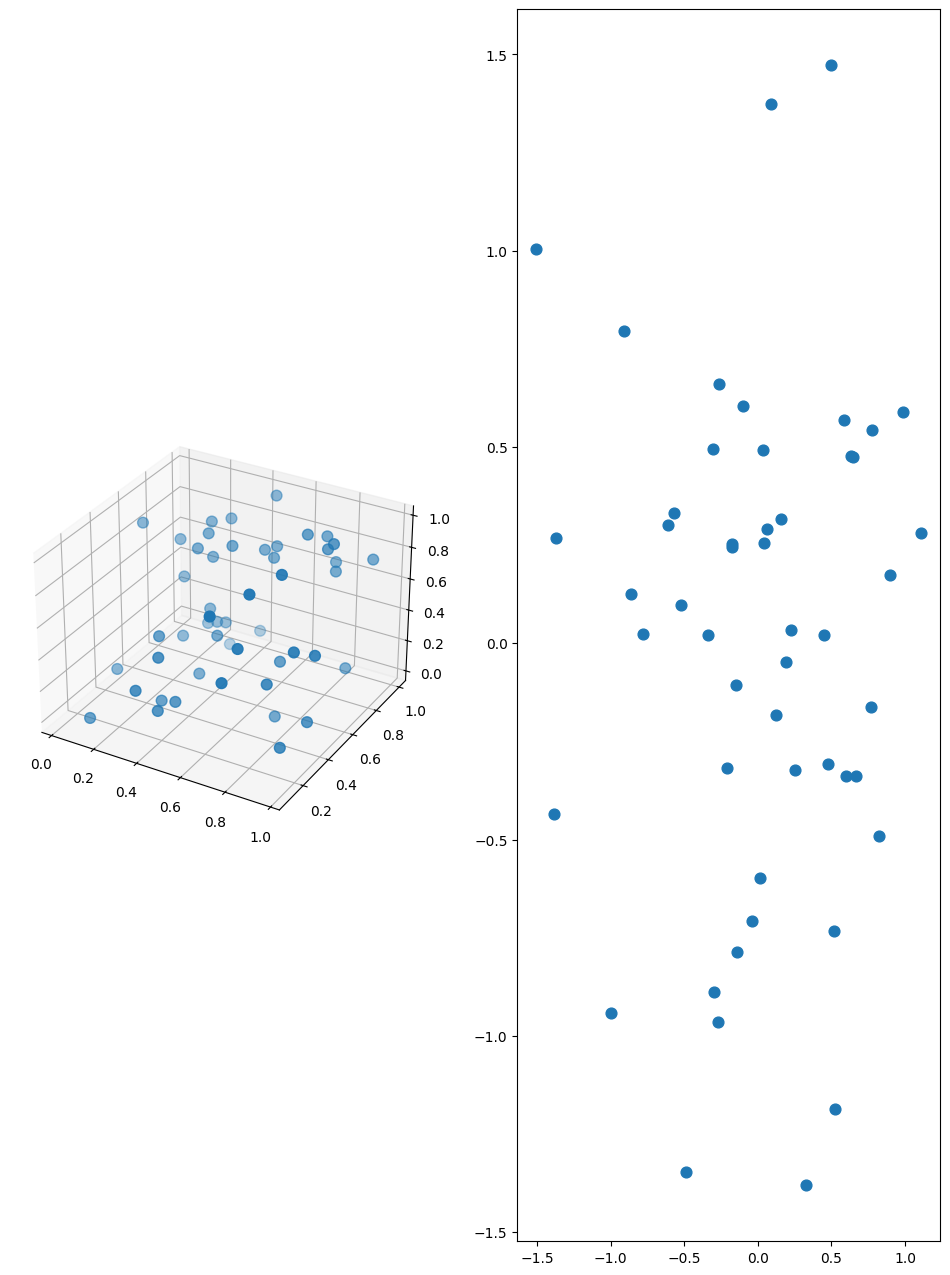

In [101]:
import matplotlib.pyplot as plt

# Plot initialization
fig = plt.figure(figsize=(12,16))

ax1 = fig.add_subplot(121, projection='3d') #1แถวมี2คอลัม ฟิกเกอร์1
ax1.scatter(Σ[:,0], Σ[:,1], Σ[:,2], s=60);

ax2 = fig.add_subplot(122)
ax2.scatter(M2[:,0], M2[:,1], s=60);

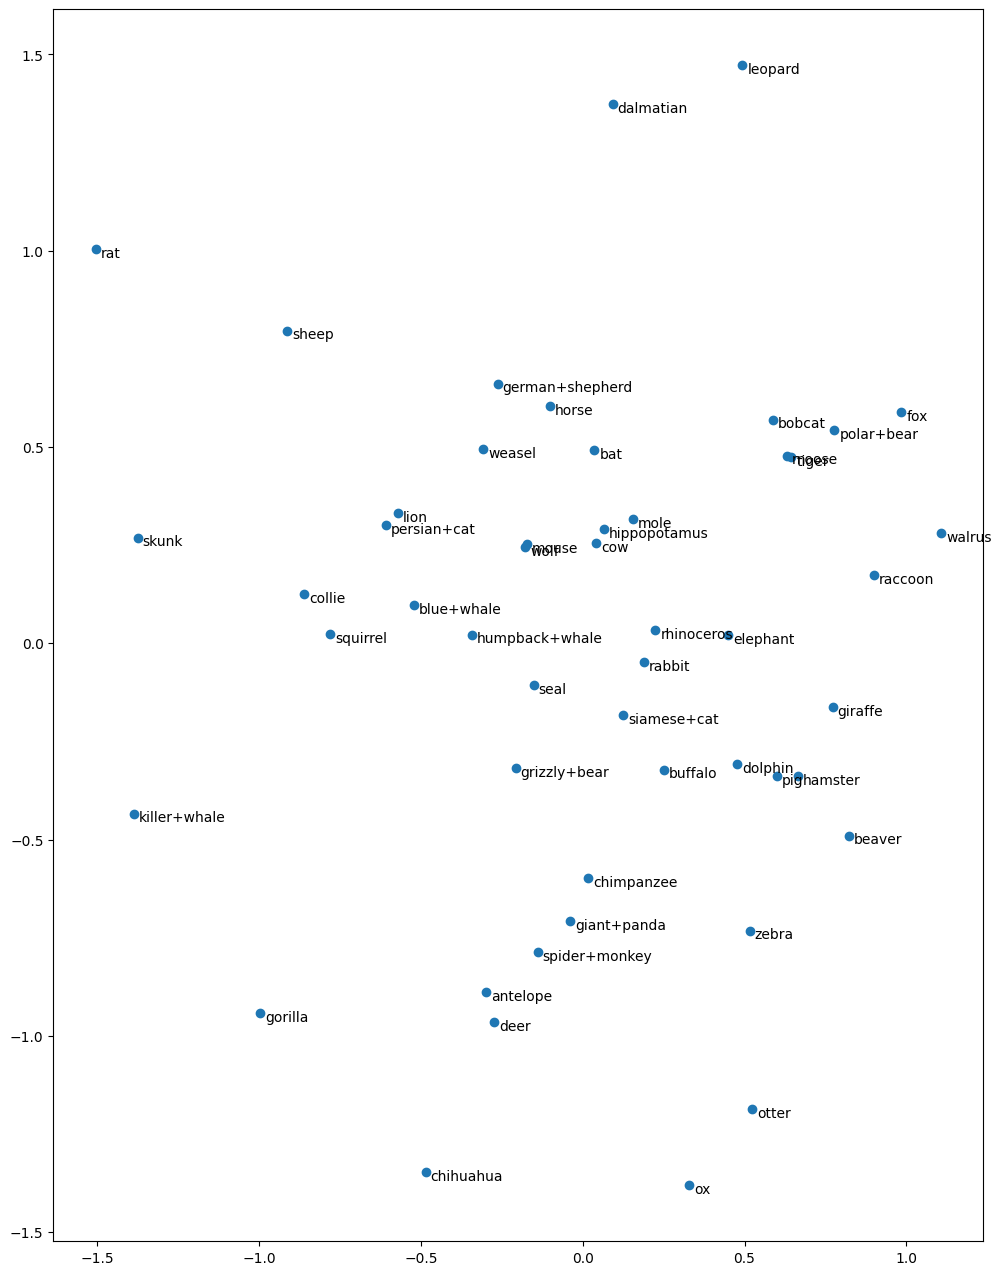

In [105]:

# กำหนดขนาดของรูป
plt.figure(figsize=(12,16))


# จงเติม argument ที่เหมาะสมในวงเล็บข้างล่างนี้
# รูปแบบของฟังก์ชันคือ plt.scatter(numpy array ของ x-coordinate, numpy array ของ y-coordinate)
plt.scatter( M2[:,0] ,M2[:,1]);
            #TODO: 1st column of your 50x2 matrix, #TODO: 2nd column of your 50x2 matrix

# for loop เพื่อใส่คำกำกับ (annotate) ชื่อสัตว์ของแต่ละจุด วนให้ครบสัตว์ทุกชนิดที่อยู่ใน classes
# ใส่ numpy array ที่ผ่านการทำ PCA แล้วลงในตำแหน่งที่ระบุเพื่อบอกพิกัดที่ต้องวางคำกำกับ
for i in range(50):
      plt.annotate(classes[i,1],
                        xy=(M2[i,0] ,M2[i,1]),
              #TODO: YOUR_MATRIX[i,0],
              #TODO YOUR_MATRIX[i,1]),
                        xytext=(5, -8),
                        textcoords='offset pixels')


plt.show()

#### Exercise 3

หากลุ่มสัตว์ต่างๆ ที่อยู่ใกล้กันมา 4 กลุ่ม แล้วลองอธิบายว่าสัตว์ในแต่ละกลุ่มมีอะไรที่เหมือนกัน

1. กลุ่มสัตว์ที่มุมขวาบน Dalmatian และ Leopard มีลักษณะที่เหมือนกันคือ มีลายจุด ที่อยู่ตามตัวเหมือนกัน
2.กลุ่มสัตว์ที่ขวาบนถัดลงมา เช่น Fox,bobcat มีลักษณะที่เหมือนกันคือ สัตว์กินเนื้อ อาศัยในถิ่นเดียวกัน ออกหากินกลางคืน
3.กลุ่มสัตว์ที่ตรงกลาง เช่น mole,cow มีลักษณะที่เหมือนกันคือ  เป็นสัตว์เลี้ยงลูกด้วยนม เป็นสัตว์เลือดอุ่น มีกระดูกสันหลัง
4.กลุ่มสัตว์ที่อยู่ล่างแต่ยังไม่ล่างสุด เช่น chimpanzee , giant+panda มีลักษณะที่เหมือนกันคือ มีการดูแลลูกอ่อน	มีสมองใหญ่และพฤติกรรมซับซ้อน